In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load dataset
df = pd.read_csv('Telco_Customer_Churn_Dataset.csv')

In [16]:
# Clean 'TotalCharges' column as it may have blanks
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(" ", pd.NA))
df.dropna(subset=['TotalCharges'], inplace=True)

Overall churn rate (%):
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


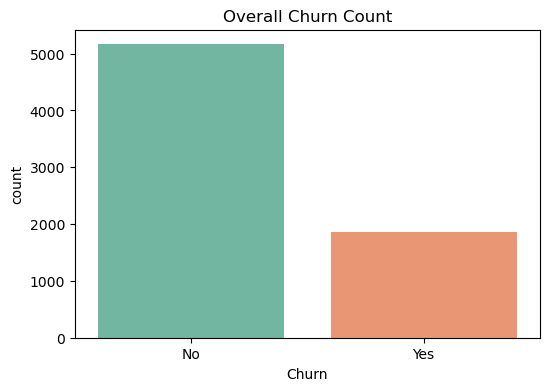

In [17]:
# 1. Calculate and visualize overall churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Overall churn rate (%):")
print(churn_rate)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2')
plt.title('Overall Churn Count')
plt.show()

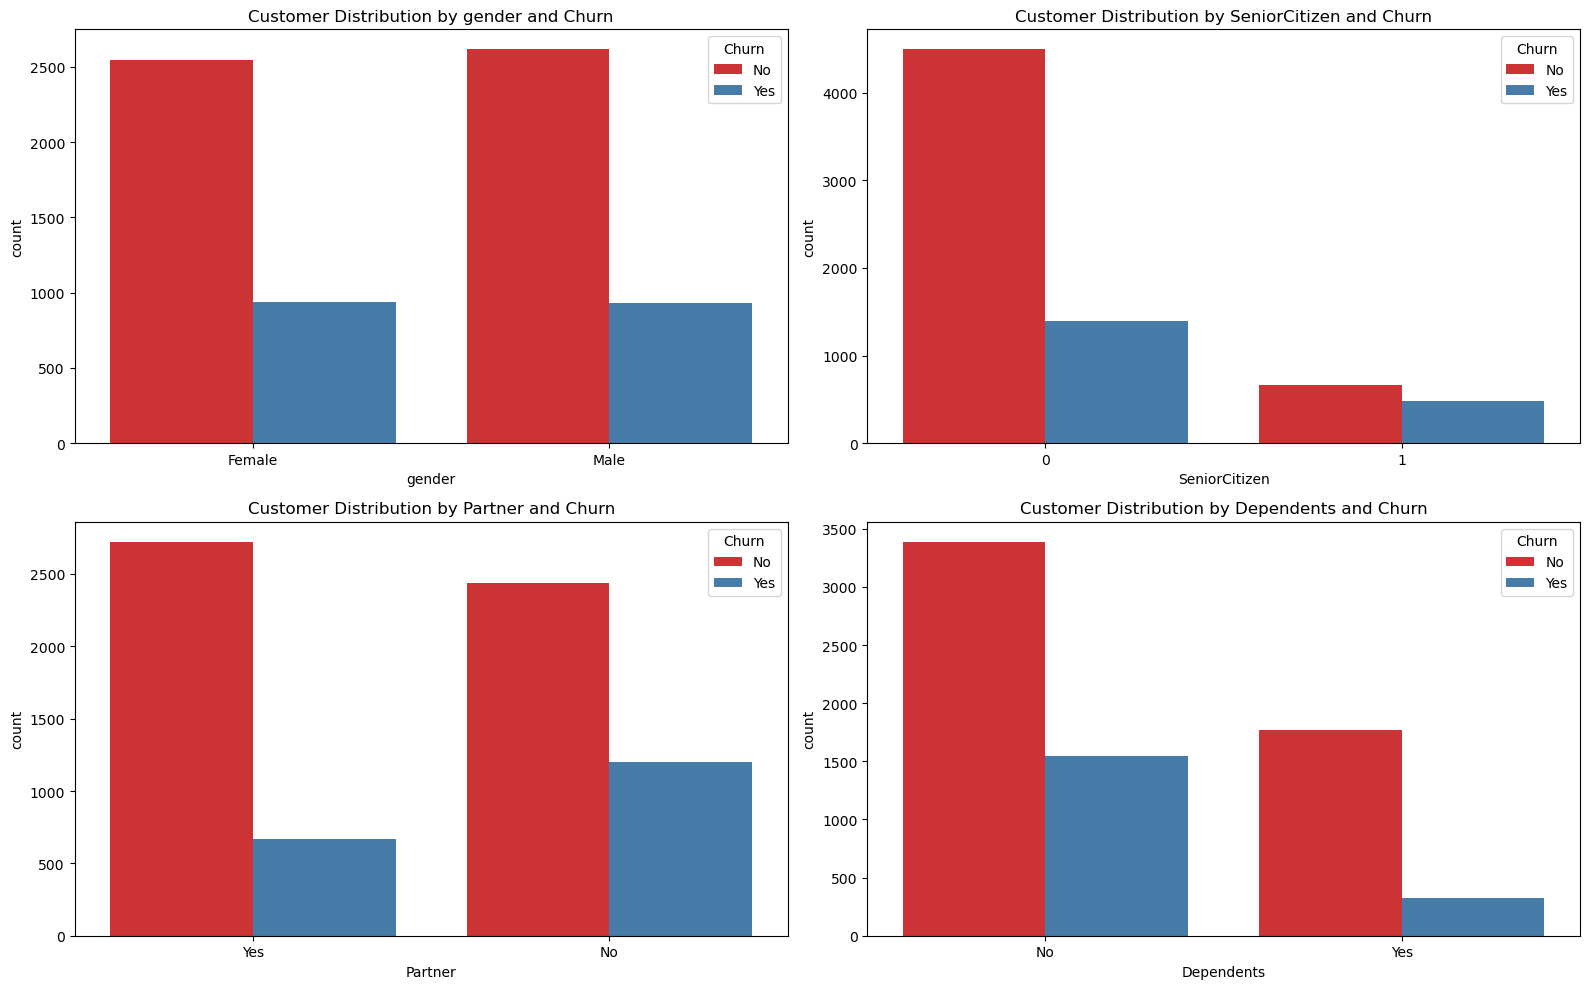

In [18]:
# 2. Explore customer distribution by demographics
demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(16, 10))
for i, col in enumerate(demographics, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue='Churn', palette='Set1')
    plt.title(f'Customer Distribution by {col} and Churn')
plt.tight_layout()
plt.show()

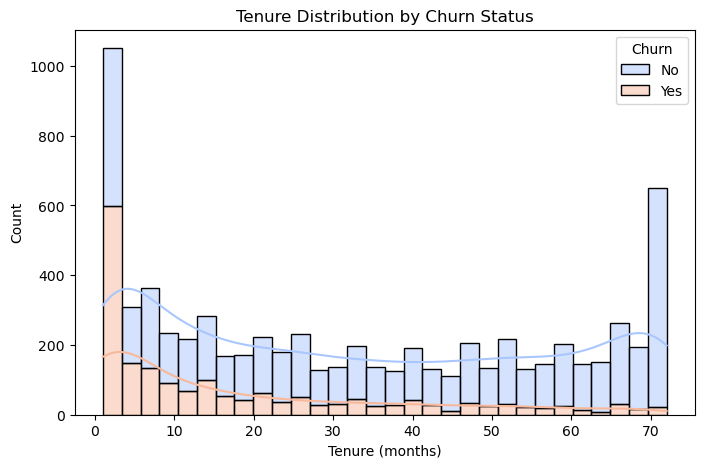

In [19]:
# 3. Analyze tenure distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', bins=30, kde=True, hue='Churn', multiple='stack', palette='coolwarm')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (months)')
plt.show()

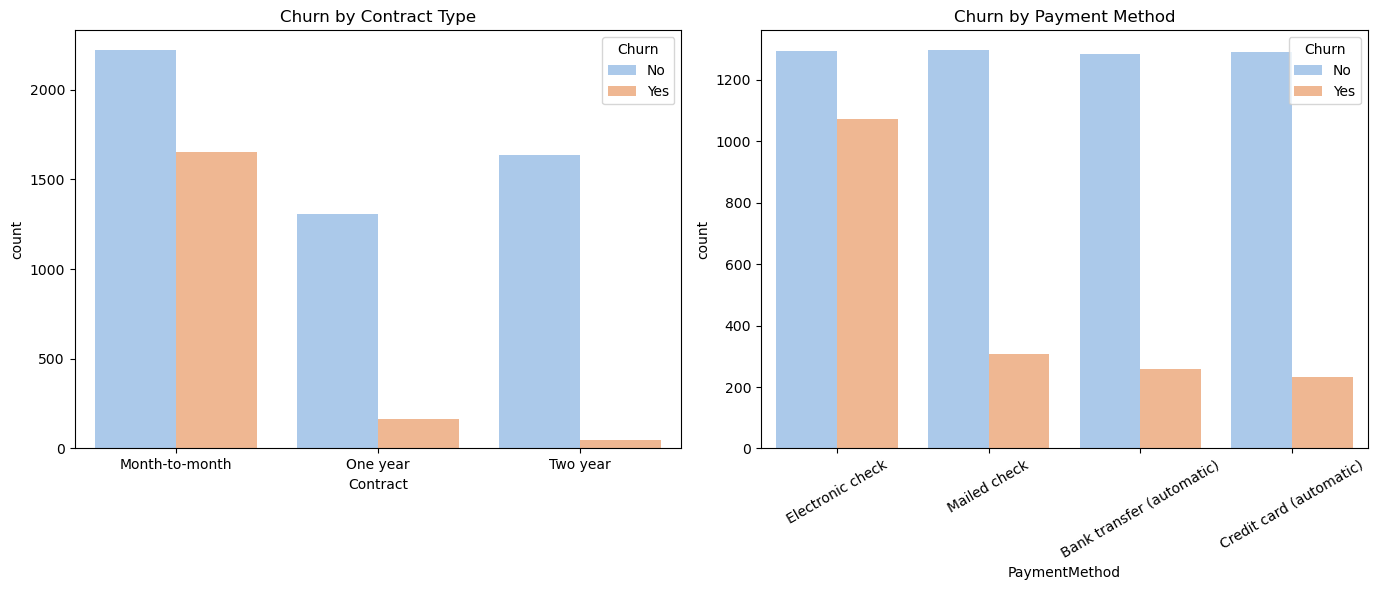

In [20]:
# 4. Investigate churn vs contract types and payment methods
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')
plt.title('Churn by Contract Type')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='pastel')
plt.title('Churn by Payment Method')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()